<a href="https://colab.research.google.com/github/om-ashish-soni/CE137_ML_LABS/blob/main/ML_LAB10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Trying Navie bayes on fetch_olivetti_faces() dataset

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
df=fetch_olivetti_faces()
print(df.data.shape)
print(df.target.shape)

X=df.data
y=df.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=137)
model=GaussianNB()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
# print(y_pred)

print(accuracy_score(y_test,y_pred))

(400, 4096)
(400,)
0.975


## doing pca for fetch_olivetti_faces dataset





In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

df=fetch_olivetti_faces()
X=df.data
y=df.target



def gnb_classify(X_train,X_test,y_train,y_test):
  gnb=GaussianNB()
  gnb.fit(X_train,y_train)
  gnb_pred=gnb.predict(X_test)
  # print(gnb_pred)
  return accuracy_score(y_test,gnb_pred)
  pass
def dt_classify(X_train,X_test,y_train,y_test):
  dt=DecisionTreeClassifier()
  dt.fit(X_train,y_train)
  dt_pred=dt.predict(X_test)
  # print(dt_pred)
  return accuracy_score(y_test,dt_pred)
  pass
def svm_classify(X_train,X_test,y_train,y_test):
  svm=SVC()
  svm.fit(X_train,y_train)
  svm_pred=svm.predict(X_test)
  # print(svm_pred)
  return accuracy_score(y_test,svm_pred)
  pass

def pipe_classify(X_train,X_test,y_train,y_test,models):
  pipe_model=Pipeline(models)
  pipe_model.fit(X_train,y_train)
  pipe_pred=pipe_model.predict(X_test)
  return accuracy_score(y_test,pipe_pred)
  pass


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

print("before pca : ====================== ")

gnb_accuracy=gnb_classify(X_train,X_test,y_train,y_test)
# dt_accuracy=dt_classify(X_train,X_test,y_train,y_test)
svm_accuracy=svm_classify(X_train,X_test,y_train,y_test)

print("gnb_accuracy : ",gnb_accuracy)
# print("dt_accuracy : ",dt_accuracy)
print("svm_accuracy : ",svm_accuracy)

pca=PCA(n_components=200,whiten=True)
pca.fit(X_train)
X_train=pca.transform(X_train)
X_test=pca.transform(X_test)

gnb_accuracy=gnb_classify(X_train,X_test,y_train,y_test)
# dt_accuracy=dt_classify(X_train,X_test,y_train,y_test)
svm_accuracy=svm_classify(X_train,X_test,y_train,y_test)

print("after pca : ============================")

print("gnb_accuracy : ",gnb_accuracy)
# print("dt_accuracy : ",dt_accuracy)
print("svm_accuracy : ",svm_accuracy)


models=[('scaler', StandardScaler()),('svc', SVC())]
pipe_accuracy=pipe_classify(X_train,X_test,y_train,y_test,models)
print("pipe_accuracy : ",pipe_accuracy)



before pca : ====================== 
gnb_accuracy :  0.9
svm_accuracy :  0.975
after pca : ============================
gnb_accuracy :  0.975
svm_accuracy :  0.975
pipe_accuracy :  0.975


## Trying exercise 




Que) 

1. Train the Naive Bayes model without PCA and compare the result with PCA + Naive Bayes. Write down your observations. 

Ans : 

Accuracy is increased after doing pca.
Accuracy before pca : 0.900
Accuracy after pca : 0.975

Reasons : 

 pca removes features with high variance
 pca removes redundant and correlated features.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

df=fetch_olivetti_faces()
X=df.data
y=df.target

def gnb_classify(X_train,X_test,y_train,y_test):
  gnb=GaussianNB()
  gnb.fit(X_train,y_train)
  gnb_pred=gnb.predict(X_test)
  return accuracy_score(y_test,gnb_pred)
  pass
def dt_classify(X_train,X_test,y_train,y_test):
  dt=DecisionTreeClassifier()
  dt.fit(X_train,y_train)
  dt_pred=dt.predict(X_test)
  return accuracy_score(y_test,dt_pred)
  pass
def svm_classify(X_train,X_test,y_train,y_test):
  svm=SVC()
  svm.fit(X_train,y_train)
  svm_pred=svm.predict(X_test)
  return accuracy_score(y_test,svm_pred)
  pass

def pipe_classify(X_train,X_test,y_train,y_test,models):
  pipe_model=Pipeline(models)
  pipe_model.fit(X_train,y_train)
  pipe_pred=pipe_model.predict(X_test)
  return accuracy_score(y_test,pipe_pred)
  pass


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=137)

print("before pca : ====================== ")

gnb_accuracy=gnb_classify(X_train,X_test,y_train,y_test)
svm_accuracy=svm_classify(X_train,X_test,y_train,y_test)

print("gnb_accuracy : ",gnb_accuracy)
print("svm_accuracy : ",svm_accuracy)

pca=PCA(n_components=200,whiten=True)
pca.fit(X_train)

X_train=pca.transform(X_train)
X_test=pca.transform(X_test)

gnb_accuracy=gnb_classify(X_train,X_test,y_train,y_test)
svm_accuracy=svm_classify(X_train,X_test,y_train,y_test)
print("after pca : ============================")
print("gnb_accuracy : ",gnb_accuracy)
print("svm_accuracy : ",svm_accuracy)
models=[('scaler', StandardScaler()),('svc', SVC())]



2. Run PCA on IRIS dataset. Visualise the output in
2 dimensions using to Principal components. Choose different pairs of principal components and
note down your observations

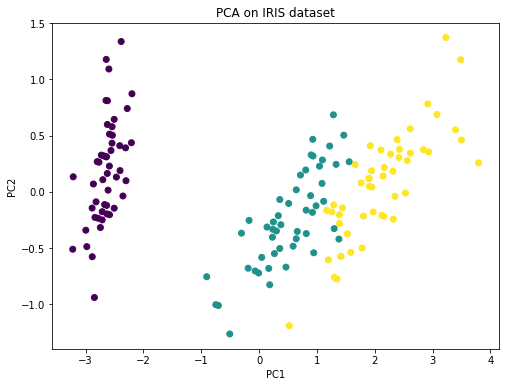

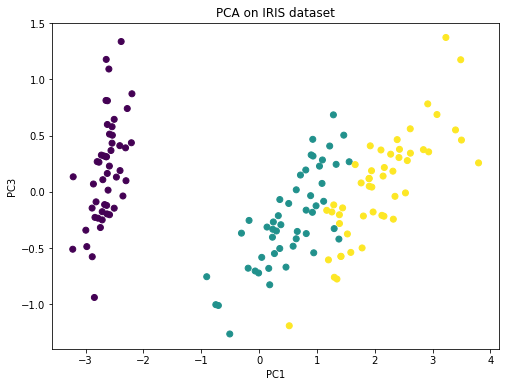

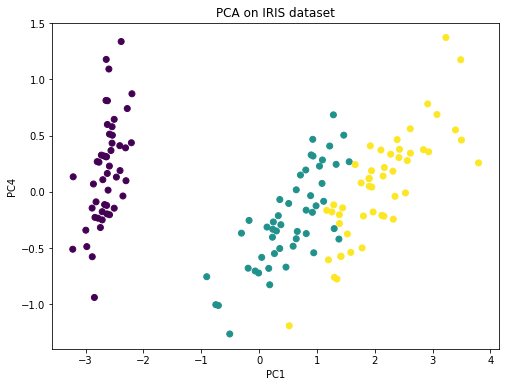

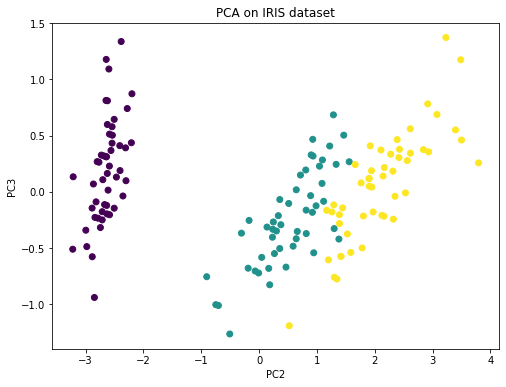

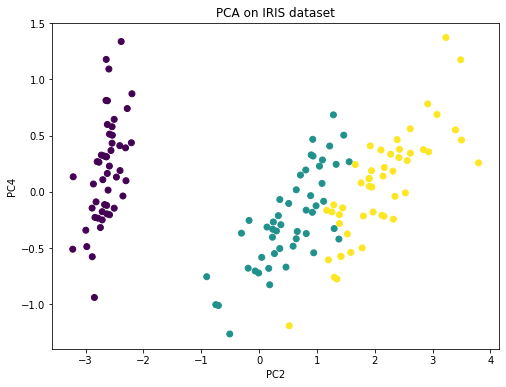

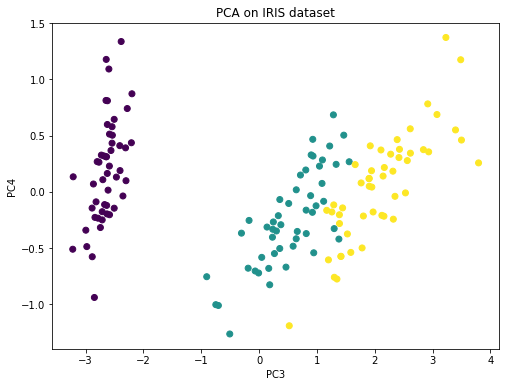

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA to reduce the dimensionality of the data to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the results using different pairs of principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA on IRIS dataset')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.title('PCA on IRIS dataset')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC4')
plt.title('PCA on IRIS dataset')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.title('PCA on IRIS dataset')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('PC2')
plt.ylabel('PC4')
plt.title('PCA on IRIS dataset')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.title('PCA on IRIS dataset')
plt.show()


In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

df=load_iris()
X=df.data
y=df.target

def gnb_classify(X_train,X_test,y_train,y_test):
  gnb=GaussianNB()
  gnb.fit(X_train,y_train)
  gnb_pred=gnb.predict(X_test)
  return accuracy_score(y_test,gnb_pred)
  pass


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print("before pca : ====================== ")

gnb_accuracy=gnb_classify(X_train,X_test,y_train,y_test)
print("gnb_accuracy : ",gnb_accuracy)

pca=PCA(n_components=2)
pca.fit(X_train)


X_train=pca.transform(X_train)
X_test=pca.transform(X_test)

print("after pca : X_test : ",X_test)

gnb_accuracy=gnb_classify(X_train,X_test,y_train,y_test)
print("after pca : ============================")
print("gnb_accuracy : ",gnb_accuracy)



before pca : ====================== 
gnb_accuracy :  1.0
after pca : X_test :  [[ 0.96873884 -0.16191895]
 [-2.15827783  0.87651712]
 [ 3.84073027  0.29102786]
 [ 0.85922818 -0.14689823]
 [ 1.37724773  0.26723591]
 [-2.36654757  0.41251224]
 [-0.12791711 -0.24432722]
 [ 1.96460773  0.42638905]
 [ 0.99314654 -0.52371424]
 [ 0.18343711 -0.29933501]
 [ 1.70517136  0.25980183]
 [-2.73929008 -0.23307394]
 [-2.58234715  0.6013324 ]
 [-2.62643526 -0.11098174]
 [-2.54541161  0.51346113]
 [ 1.13875122  0.30044465]
 [ 2.39476265 -0.01909801]
 [ 0.09370154 -0.56856571]
 [ 0.68907607 -0.40116151]
 [ 2.20497517 -0.19721019]
 [-2.5857203  -0.19543719]
 [ 1.33636405 -0.099865  ]
 [-2.42443591  0.13153472]
 [ 2.16934852 -0.18887919]
 [ 3.27028025  1.40411218]
 [ 1.98743146  0.20484733]
 [ 2.36843897 -0.21717274]
 [ 2.60622076  0.29951625]
 [-2.66803677 -0.24973594]
 [-2.54093041 -0.20207361]]
after pca : ============================
gnb_accuracy :  0.9333333333333333


3. Run PCA + Naive Bayes classifier on IRIS dataset and calculate
precision and recall of the system.

Ans : 

before pca : 
   accuracy : 0.97
  precision : 0.96
  recall :  0.96
  
after pca : 
 accuracy : 0.96
 precision : 0.95
 recall :  0.95

In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
df=load_iris()
X=df.data
y=df.target

def gnb_classify(X_train,X_test,y_train,y_test):
  gnb=GaussianNB()
  gnb.fit(X_train,y_train)
  
  gnb_pred=gnb.predict(X_test)
  print("classifcation report : ")
  print(classification_report(y_test,gnb_pred))
  print(confusion_matrix(y_test,gnb_pred))
  return accuracy_score(y_test,gnb_pred)
  pass


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)

print("before pca : ====================== ")

gnb_accuracy=gnb_classify(X_train,X_test,y_train,y_test)
print("gnb_accuracy : ",gnb_accuracy)

pca=PCA(n_components=2)
pca.fit(X_train)


X_train=pca.transform(X_train)
X_test=pca.transform(X_test)

print("after pca : X_test : ",X_test)

gnb_accuracy=gnb_classify(X_train,X_test,y_train,y_test)
print("after pca : ============================")
print("gnb_accuracy : ",gnb_accuracy)



before pca : ====================== 
classifcation report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      0.95      0.95        19
           2       0.94      0.94      0.94        18

    accuracy                           0.97        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60

[[23  0  0]
 [ 0 18  1]
 [ 0  1 17]]
gnb_accuracy :  0.9666666666666667
after pca : X_test :  [[ 0.83185289 -0.10700919]
 [-2.26939245  0.99049378]
 [ 3.70870516  0.298846  ]
 [ 0.72645456 -0.10464194]
 [ 1.24538791  0.32881866]
 [-2.48852948  0.53352013]
 [-0.26185418 -0.18357604]
 [ 1.84514453  0.43914819]
 [ 0.84381387 -0.453226  ]
 [ 0.04429375 -0.23009743]
 [ 1.58419945  0.27118665]
 [-2.87639766 -0.09912868]
 [-2.70178163  0.73349841]
 [-2.76066813  0.01971397]
 [-2.6595924   0.61775797]
 [ 1.01794869  0.32803802]
 [ 2.26801016 -0.02444135]
 [-0.

4. Replace Naive Bayes Classifier with Decision Tree Classifier
and then Support Vector Machine and compare performance of all three of them.


Ans )

before pca : ====================== 

gnb_accuracy :  1.0
dt_accuracy :  0.9777777777777777
svm_accuracy :  0.9777777777777777

after pca : ============================

gnb_accuracy :  0.9555555555555556
dt_accuracy :  0.9555555555555556
svm_accuracy :  0.9777777777777777

In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

df=load_iris()
X=df.data
y=df.target



def gnb_classify(X_train,X_test,y_train,y_test):
  gnb=GaussianNB()
  gnb.fit(X_train,y_train)
  gnb_pred=gnb.predict(X_test)
  # print(gnb_pred)
  return accuracy_score(y_test,gnb_pred)
  pass
def dt_classify(X_train,X_test,y_train,y_test):
  dt=DecisionTreeClassifier()
  dt.fit(X_train,y_train)
  dt_pred=dt.predict(X_test)
  # print(dt_pred)
  return accuracy_score(y_test,dt_pred)
  pass
def svm_classify(X_train,X_test,y_train,y_test):
  svm=SVC()
  svm.fit(X_train,y_train)
  svm_pred=svm.predict(X_test)
  # print(svm_pred)
  return accuracy_score(y_test,svm_pred)
  pass

def pipe_classify(X_train,X_test,y_train,y_test,models):
  pipe_model=Pipeline(models)
  pipe_model.fit(X_train,y_train)
  pipe_pred=pipe_model.predict(X_test)
  return accuracy_score(y_test,pipe_pred)
  pass


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=137)

print("before pca : ====================== ")

gnb_accuracy=gnb_classify(X_train,X_test,y_train,y_test)
dt_accuracy=dt_classify(X_train,X_test,y_train,y_test)
svm_accuracy=svm_classify(X_train,X_test,y_train,y_test)

print("gnb_accuracy : ",gnb_accuracy)
print("dt_accuracy : ",dt_accuracy)
print("svm_accuracy : ",svm_accuracy)

pca=PCA(n_components=2)
pca.fit(X[:,0:2])
X_train=pca.transform(X_train[:,0:2])
X_test=pca.transform(X_test[:,0:2])

gnb_accuracy=gnb_classify(X_train,X_test,y_train,y_test)
dt_accuracy=dt_classify(X_train,X_test,y_train,y_test)
svm_accuracy=svm_classify(X_train,X_test,y_train,y_test)

print("after pca : ============================")

print("gnb_accuracy : ",gnb_accuracy)
print("dt_accuracy : ",dt_accuracy)
print("svm_accuracy : ",svm_accuracy)






before pca : ====================== 
gnb_accuracy :  1.0
dt_accuracy :  1.0
svm_accuracy :  0.9777777777777777
after pca : ============================
gnb_accuracy :  0.7555555555555555
dt_accuracy :  0.7111111111111111
svm_accuracy :  0.8444444444444444
